哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [2]:
import pandas as pd 

In [4]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
data_a = pd.read_csv('A_lvr_land_A.csv')
data_b = pd.read_csv('B_lvr_land_A.csv')
data_e = pd.read_csv('E_lvr_land_A.csv')
data_f = pd.read_csv('F_lvr_land_A.csv')

D:\Users\Meng-Hsin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
data_a = data_a.iloc[1:]
data_b = data_b.iloc[1:]
data_e = data_e.iloc[1:]
data_f = data_f.iloc[1:]


,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,單價元平方公尺,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN
6,文山區,房地(土地+建物),臺北市文山區景中街30巷1~30號,9.19,其他,NaN,NaN,1090428,土地1建物1車位0,三層,...,63633,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSNMLOKNHPFFAA97CA,44.82,0.00,5.28,NaN


In [8]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
data_a['city'] = 'Taipei'
data_b['city'] = 'New_Taipei'
data_e['city'] = 'Taichung'
data_f['city'] = 'Kaohsiung'

In [9]:
#4. 將以上四份資料運用pd.concat()串接
all_data = pd.concat([data_a,data_b,data_e,data_f],axis=0)
all_data

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,city
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
6,文山區,房地(土地+建物),臺北市文山區景中街30巷1~30號,9.19,其他,NaN,NaN,1090428,土地1建物1車位0,三層,...,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSNMLOKNHPFFAA97CA,44.82,0.00,5.28,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,Kaohsiung
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,Kaohsiung
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,Kaohsiung
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,Kaohsiung


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [11]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [22]:
#顯示所有行
pd.set_option('display.max_columns', 100)
#顯示所有列
pd.set_option('display.max_rows', 100)
#顯示行設定
pd.set_option('max_colwidth',100)


#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
analysis_data = all_data.rename(columns=columns_mapping)
analysis_data

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,total_floor_number,building_state,main_use,main_materials,complete_date,building_area_square_meter,room_number,hall_number,health_number,compartmented_number,manages,total_price,unit_price,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
2,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,0850503,37.31,2,1,1,有,有,5580000,149558,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
3,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,十九層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,1000214,131.14999999999998,3,2,2,有,有,23800000,181472,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
4,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,十四層,住宅大樓(11層含以上有電梯),住家用,見其他登記事項,0970513,38.17,1,1,1,有,有,11430000,299450,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
5,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,六層,華廈(10層含以下有電梯),住家用,鋼筋混凝土造,0791127,123.66,3,2,2,有,無,18280000,147825,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei
6,文山區,房地(土地+建物),臺北市文山區景中街30巷1~30號,9.19,其他,NaN,NaN,1090428,土地1建物1車位0,三層,七層,套房(1房1廳1衛),見使用執照,鋼筋混凝土造,0770212,62.86,1,1,1,有,有,4000000,63633,NaN,0.0,0,親友、員工或其他特殊關係間之交易。;,RPSNMLOKNHPFFAA97CA,44.82,0.00,5.28,NaN,Taipei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,十三層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,1.09062e+06,155.7,3,2,2,有,有,8380000,58059,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,Kaohsiung
19815,三峽區,土地,成福段成福小段331~360地號,762,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,NaN,其他,NaN,NaN,NaN,0,0,0,0,有,無,1600000,2100,NaN,0,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,Kaohsiung
19816,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,十三層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,1.09062e+06,155.7,3,2,2,有,有,9050000,61010,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,Kaohsiung
19817,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,九層,華廈(10層含以下有電梯),見其他登記事項,鋼筋混凝土造,1.06031e+06,109.6,2,2,1,有,有,7300000,66606,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,Kaohsiung


In [35]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
# analysis_data.loc[analysis_data.main_use =='住家用']
# analysis_data.loc[analysis_data.use_zoning =='住']
# analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住')]
# analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住'),analysis_columns]
analysis_data = analysis_data.loc[(analysis_data.main_use=='住家用')&(analysis_data.use_zoning=='住'),analysis_columns].dropna()

In [37]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
analysis_data.info()
analysis_data = analysis_data.astype(columns_type)
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 2 to 11512
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7801 non-null   object 
 1   towns                       7801 non-null   object 
 2   main_use                    7801 non-null   object 
 3   use_zoning                  7801 non-null   object 
 4   total_price                 7801 non-null   object 
 5   building_area_square_meter  7801 non-null   object 
 6   main_building_area          7801 non-null   float64
 7   tx_dt                       7801 non-null   object 
 8   unit_price                  7801 non-null   object 
 9   room_number                 7801 non-null   object 
 10  hall_number                 7801 non-null   object 
 11  health_number               7801 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.3+ KB
<class 'pandas.core.frame.DataFrame'>
I

In [45]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引


#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
analysis_data['tx_dt_year'] = analysis_data['tx_dt'].apply(lambda x: x[:3])
analysis_data['tx_dt_year'].head()

#     1.交易年月日(tx_dt_year)，限制在109年
analysis_data = analysis_data.loc[(analysis_data.tx_dt_year=='109')]
analysis_data.head()

#     2.建物現況格局-房(room_number)，限制在1到5間
analysis_data = analysis_data.loc[(analysis_data.room_number <= 5)]
analysis_data = analysis_data.loc[(analysis_data.room_number >= 1)]
analysis_data.head()

#     3.建物現況格局-廳(hall_number)，限制在1到2廳
analysis_data = analysis_data.loc[(analysis_data.hall_number >= 1)]
analysis_data = analysis_data.loc[(analysis_data.hall_number <= 2)]
analysis_data.head()

#     4.最後運用.reset_index()重新定義索引
analysis_data = analysis_data.reset_index(drop=True)
analysis_data


,index,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
1,5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
2,7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
3,8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109
4,9,Taipei,文山區,住家用,住,12000000,106.36,42.19,1090419,150473.0,2,2,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,9139,Kaohsiung,新店區,住家用,住,10500000,112.33,93.18,1090516,93475.0,3,2,2,109
6889,9215,Kaohsiung,蘆洲區,住家用,住,9200000,92.14,86.55,1090529,99848.0,3,2,1,109
6890,10078,Kaohsiung,三重區,住家用,住,6000000,67.00,67.00,1090522,89552.0,1,1,1,109
6891,10142,Kaohsiung,汐止區,住家用,住,11800000,124.31,98.54,1090507,94924.0,3,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [48]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
analysis_data['building_area_square_feet']=analysis_data['building_area_square_meter'].apply(lambda x : x * 0.3025)
analysis_data['main_building_area_square_feet']=analysis_data['main_building_area'].apply(lambda x : x * 0.3025)
analysis_data['unit_price_square_feet']=analysis_data['unit_price'].apply(lambda x : x / 0.3025)
analysis_data.head()

,index,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
0,2,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109,11.286275,7.435450,494406.611570
1,5,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109,37.407150,29.868850,488677.685950
2,7,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109,37.585625,27.460950,212846.280992
3,8,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109,9.123400,7.910375,241137.190083
4,9,Taipei,文山區,住家用,住,12000000,106.36,42.19,1090419,150473.0,2,2,1,109,32.173900,12.762475,497431.404959


In [49]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
analysis_data.describe()



,index,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6893.000000,6.893000e+03,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6893.000000,6.893000e+03
mean,3406.309299,1.138355e+07,121.696392,82.082485,94355.644857,2.850863,1.793269,1.733498,36.813159,24.829952,3.119195e+05
std,2216.881092,1.159149e+07,62.862762,37.364264,58316.725573,0.898561,0.404991,0.681127,19.015986,11.302690,1.927826e+05
min,2.000000,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,1588.000000,5.580000e+06,82.960000,60.670000,53530.000000,2.000000,2.000000,1.000000,25.095400,18.352675,1.769587e+05
50%,3091.000000,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,2.631736e+05
75%,5102.000000,1.328000e+07,147.450000,95.790000,118708.000000,3.000000,2.000000,2.000000,44.603625,28.976475,3.924231e+05
max,12633.000000,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [50]:
# 觀察到有總價total_price最小值為0還有主建物面積main_building_area最小為0的，進一步將其拿掉
analysis_data = analysis_data.loc[(analysis_data.total_price!=0)&(analysis_data.main_building_area!=0)]


# 移除後再用.describe()觀察是否還有奇怪的資料?

analysis_data.describe()

,index,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6853.000000,6.853000e+03,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6853.000000,6.853000e+03
mean,3397.713994,1.141310e+07,121.752624,82.561589,94539.400846,2.849847,1.793083,1.733110,36.830169,24.974881,3.125269e+05
std,2216.446511,1.161374e+07,62.840110,36.941532,58374.138743,0.898407,0.405125,0.680911,19.009133,11.174813,1.929724e+05
min,2.000000,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,1578.000000,5.600000e+06,83.010000,61.060000,53595.000000,2.000000,2.000000,1.000000,25.110525,18.470650,1.771736e+05
50%,3083.000000,8.600000e+06,109.400000,79.090000,79737.000000,3.000000,2.000000,2.000000,33.093500,23.924725,2.635934e+05
75%,5092.000000,1.330000e+07,147.430000,95.940000,118871.000000,3.000000,2.000000,2.000000,44.597575,29.021850,3.929620e+05
max,12633.000000,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [52]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
analysis_data.loc[analysis_data.city=='Taipei']
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
analysis_data.loc[analysis_data.city=='Taipei'].corr()[['total_price','unit_price_square_feet']]

,total_price,unit_price_square_feet
index,0.077665,0.052885
total_price,1.000000,0.581533
building_area_square_meter,0.864678,0.218592
main_building_area,0.710419,0.112630
unit_price,0.581533,1.000000
room_number,0.326379,-0.100021
hall_number,0.270600,0.004978
health_number,0.598742,0.128321
building_area_square_feet,0.864678,0.218592
main_building_area_square_feet,0.710419,0.112630


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

<AxesSubplot:title={'center':'unit_price_square_feet'}, xlabel='city'>

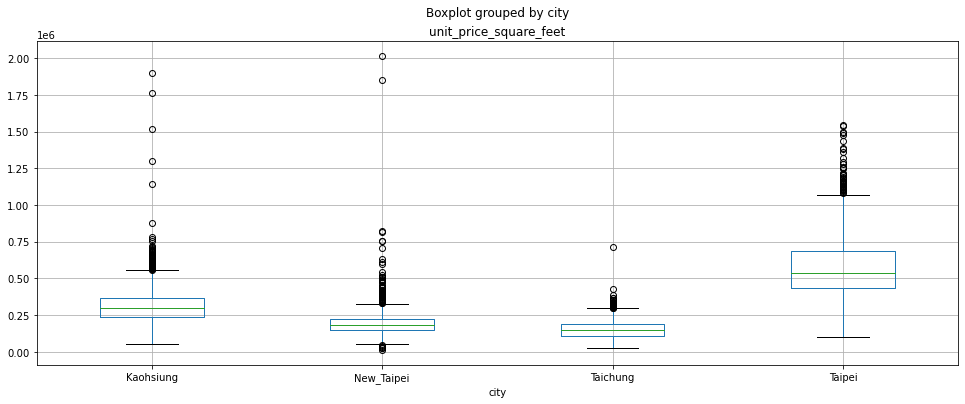

In [53]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
analysis_data.boxplot(column=['unit_price_square_feet'],by='city',figsize=(16,6))

<AxesSubplot:title={'center':'total_price'}, xlabel='room_number'>

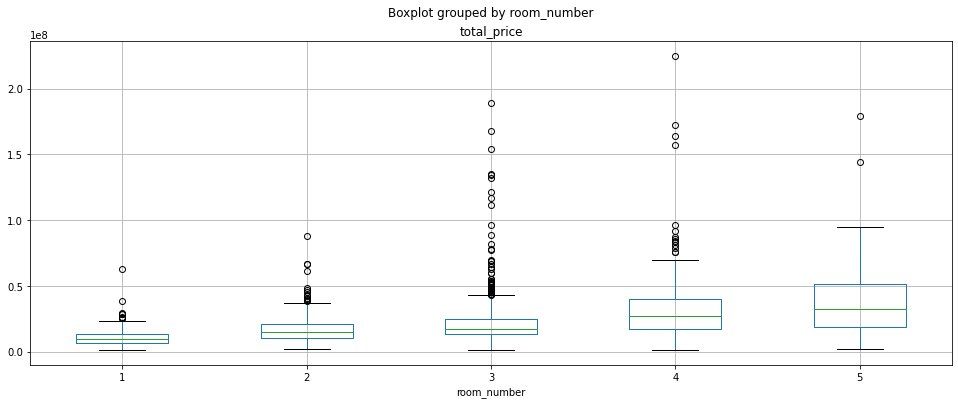

In [54]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['total_price'],by='room_number',figsize=(16,6))

<ipython-input-55-e074b99654d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)


array(['大安區'], dtype=object)

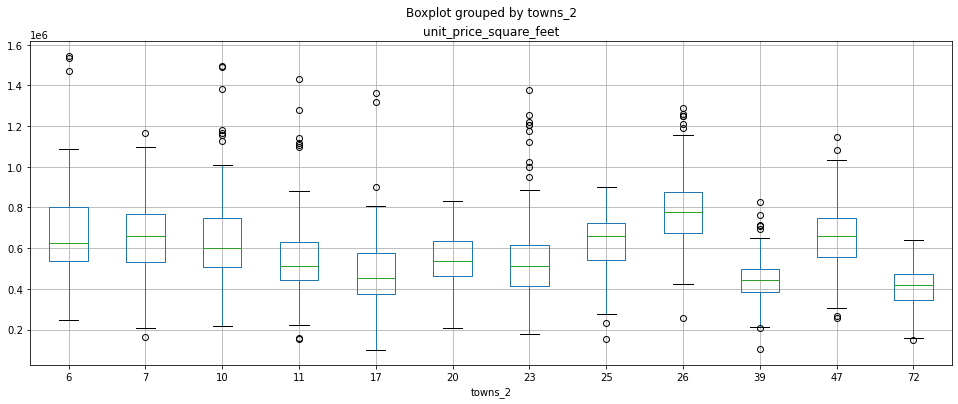

In [55]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(analysis_data['towns'].values)
analysis_data['towns_2'] = le.transform(analysis_data['towns'].values)

analysis_data.loc[analysis_data.city=='Taipei'].boxplot(column=['unit_price_square_feet'],by='towns_2',figsize=(16,6))

le.inverse_transform([26])